<a href="https://colab.research.google.com/github/mkjubran/ENEE339/blob/master/DSBSC_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSB-SC Modulation in the time domain

Import necessary libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

Set the time variable, we will generate the signal from 0 to 2m sec

In [0]:
Tstart=0
Tstop=2e-2
Tstep=1e-4
t=np.arange(Tstart,Tstop,Tstep)


Define the message signal $m(t)=A_mcos(2 \pi f_mt)$

In [0]:
Am=1
fm=100
mt=Am*np.cos(2*math.pi*fm*t)

Plot the signal m(t)

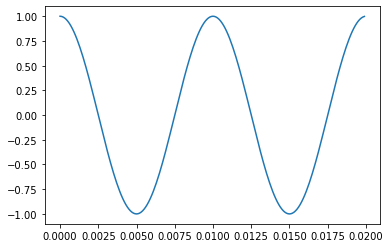

In [6]:
plt.plot(t,mt)

Now, produce the carrier signal $c(t)=A_ccos(2 \pi f_ct)$

In [0]:
Ac=1
fc=1000
ct=Ac*np.cos(2*math.pi*fc*t)

Plot c(t)

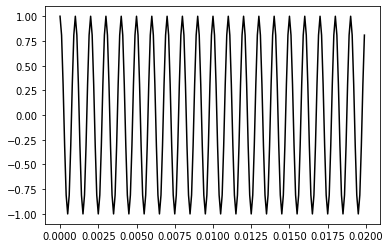

In [8]:
plt.plot(t,ct,'k')

Let us now try to produce the DSB-SC modulation signal $s(t)=m(t)c(t)=A_cm(t)cos(2 \pi f_ct)$

In [0]:
st=mt*ct

Let us plot the modulated signal s(t)

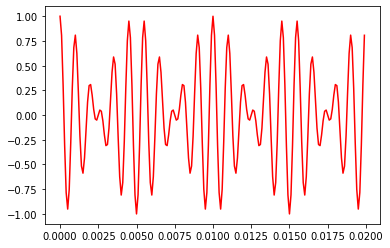

In [10]:
plt.plot(t,st,'r')

Putting all the code together

Text(0, 0.5, 'Amplitude')

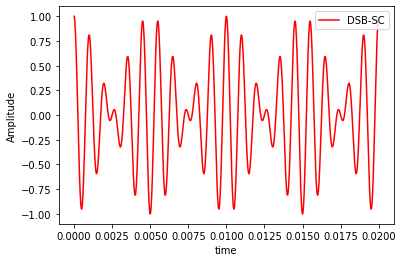

In [11]:
Am=1 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

# plot the signals
plt.plot(t,st,'r',label='DSB-SC')
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')

Let us plot the original signal and DSB-SC on thre same figure

Text(0, 0.5, 'Amplitude')

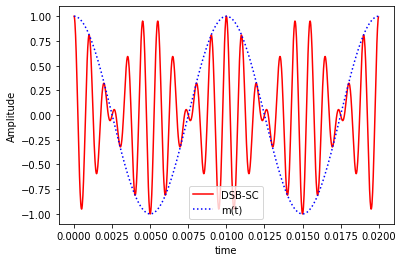

In [12]:
Am=1 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

# plot the signals
plt.plot(t,st,'r',label='DSB-SC')
plt.plot(t,mt,':b',label='m(t)')
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')

As can be observed the envelop of DSB-SC  modulated signal is not the modulating signal (m(t)).

Let plot the DSB-SS and Normal AM on the same figure and compare the two modulated signal.

Text(0, 0.5, 'Amplitude')

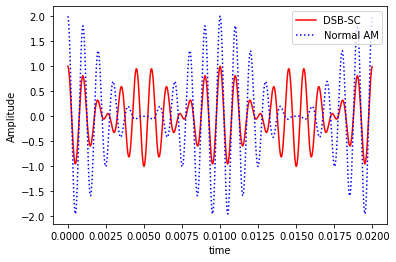

In [13]:
Am=1 # amplitude of message signal
fm=100 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=1000 # fequency of carrier signal
Ka=1 # amplitude sensitivity

Tstart=0
Tstop=2/fm
Tstep=0.002/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation
st_AM=(1+Ka*mt)*ct # normal AM modulation

# plot the signals
plt.plot(t,st,'r',label='DSB-SC')
plt.plot(t,st_AM,':b',label='Normal AM')
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')

As can be observed, the two modulated signal looks visually different. while the envelope of the Normal AM represents the modulating signal. The DSB-SC modulated signal can't be obtained using envelop detector.

# DSB-SC modulation in the frequency domain

Let us define the signals, m(t), c(t), and s(t) as we did in the previous section

In [0]:
Am=1 # amplitude of message signal
fm=1000 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=4000 # fequency of carrier signal

Tstart=0
Tstop=2000/fm
Tstep=0.08/fm

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

Let us compute and plot the amplitude spectrum of m(t). In here we will us the np.fft.fft() method.

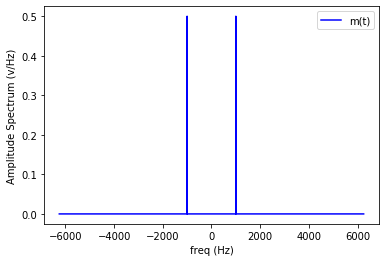

In [15]:
Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
plt.plot(freqs, Mf,'b',label='m(t)')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')
plt.legend()

We will also compute and plot the amplitude spectrum of c(t)

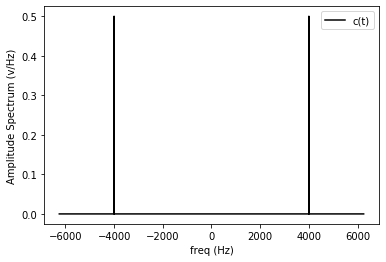

In [16]:
Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
plt.plot(freqs, Cf,'k',label='c(t)')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')
plt.legend()

Let us also compute and plot the amplitude spectrum of s(t)

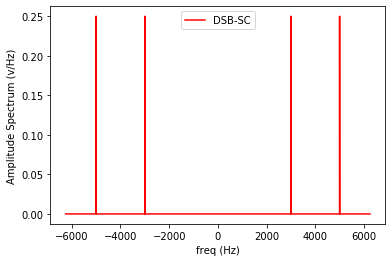

In [17]:
Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
plt.plot(freqs, Sf,'r',label='DSB-SC')
plt.xlabel('freq (Hz)')
plt.ylabel('Amplitude Spectrum (v/Hz)')
plt.legend()

As can be observed there is no carrier component in the amplitude spectrum of DSB-SC modulated signal. i.e, no delta at $f_c$.

# DSB-SC modulation in time and frequency

Let us put all the time and frequency representations code together and try to study the affect of changing few signal parameters

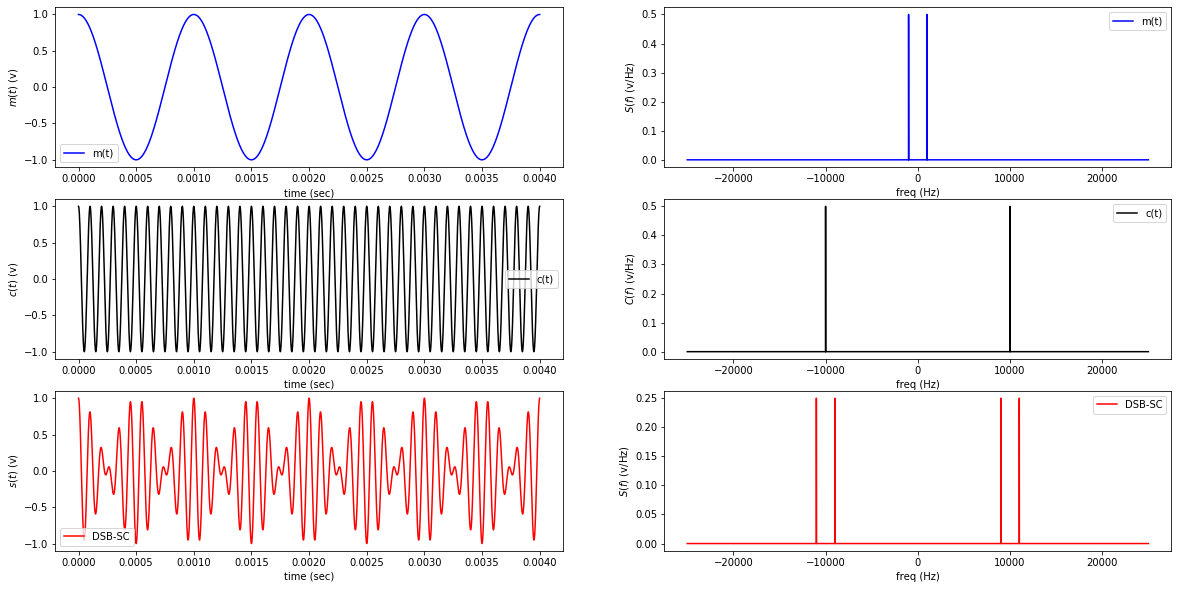

In [18]:
Am=1 # amplitude of message signal
fm=1000 # fequency of carrier signal
Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

## -- no need to change code after this line
## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # message
ct=Ac*np.cos(2*math.pi*fc*t) # carrier
st=mt*ct # DSB-SC modulation

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- $f_m$ \\
2- $f_c$ \\
3- $A_m$ \\
4- $A_c$ \\

# DSB-SC modulation of a message signal with multiple harmonics

Let us compute and plot the signal and spectrum of $x(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

First we create a function to produce m(t)

In [0]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # message #1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # message #2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # message #3
   mt=m1t+m2t+m3t # message signal
   return mt

Then we create a function that produce c(t)

In [0]:
def func_ct(Ac,fc,t,phi):
   ct=Ac*np.cos(2*math.pi*fc*t+phi*math.pi/180) # carrier
   return ct

Now, we create a function that produce the DSB-SC modulated signal s(t)

In [0]:
def DSBSC_mod(mt,ct):
   st=mt*ct # DSB-SC modulation
   return st

In the next code, we produce these signals and plot them in the time and frequency domain

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


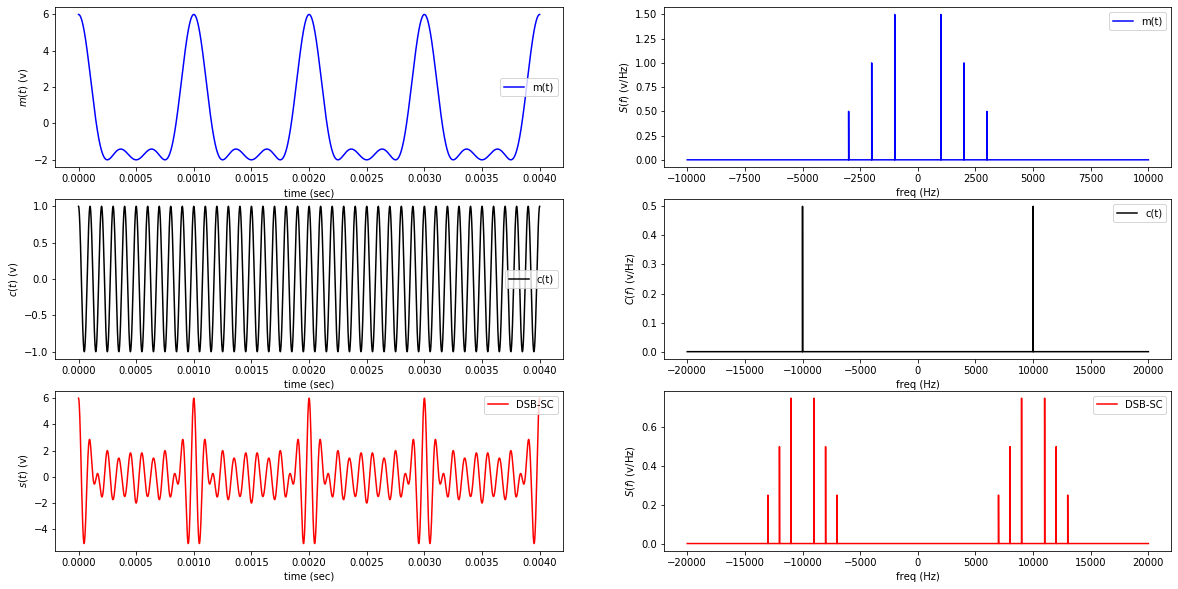

In [22]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal
Ka=0.5 # amplitude sensitivity

fm1_3=[fm1,fm2,fm3]

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

**Exercise**: change the values of the following parameters and observe the signal and its spectrum: \\
1- Amplitudes of harmonics in the message signal \\
2- Frequencies of harmonics in the message signal \\
3- $f_c$ \\
4- $A_c$ \\

# Demodulation of DSB-SC modulation using coherent demodulation

We will use coherent demodulation to demodulate a DSB-SC modulated signal. 

In [0]:
def DSBSC_demod(st,ct):
   rt=st*ct #  DSB-SC demodulation
   return rt

Let us use the coherent demodulator to recover the modulated signal

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


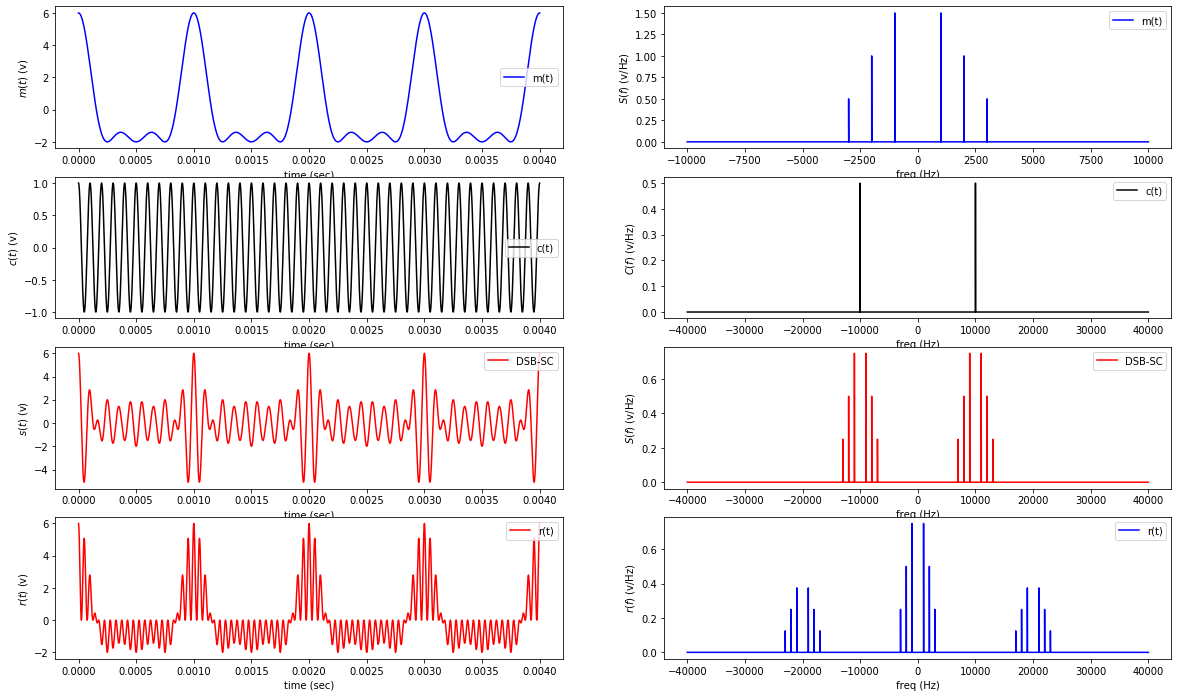

In [26]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal


Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal
Ka=0.5 # amplitude sensitivity

fm1_3=[fm1,fm2,fm3]

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

rt=DSBSC_demod(st,ct) # DSB-SC demodulation

f = plt.figure(figsize=(20,12))
ax1 = f.add_subplot(421)
ax2 = f.add_subplot(422)
ax3 = f.add_subplot(423)
ax4 = f.add_subplot(424)
ax5 = f.add_subplot(425)
ax6 = f.add_subplot(426)
ax7 = f.add_subplot(427)
ax8 = f.add_subplot(428)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,rt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Rf = np.abs(np.fft.fft(rt))
freqs = np.fft.fftfreq(rt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Rf=Rf[idx]/N
ax8.plot(freqs, Rf,'b',label='r(t)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$r(f)$ (v/Hz)')
ax8.legend()

Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

As can be observed, a Low pass filter is neeted to recover the modulated signal $\hat{m}(t)$.


Let us define a butter a Butterworth filter with Bandwidth equal to $f_{3dB}$.

In [0]:
#f3db : cut-off frequency
#forder: order of the filter
from scipy import signal
def func_filter(rt,f3db,Tstep,forder):
   fs=1/Tstep
   w = fc / (fs / 2) # Normalize the frequency
   b, a = signal.butter(forder, w, 'low')
   output = signal.filtfilt(b, a, rt)
   return output

Now, let us apply the filter and observe the output

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


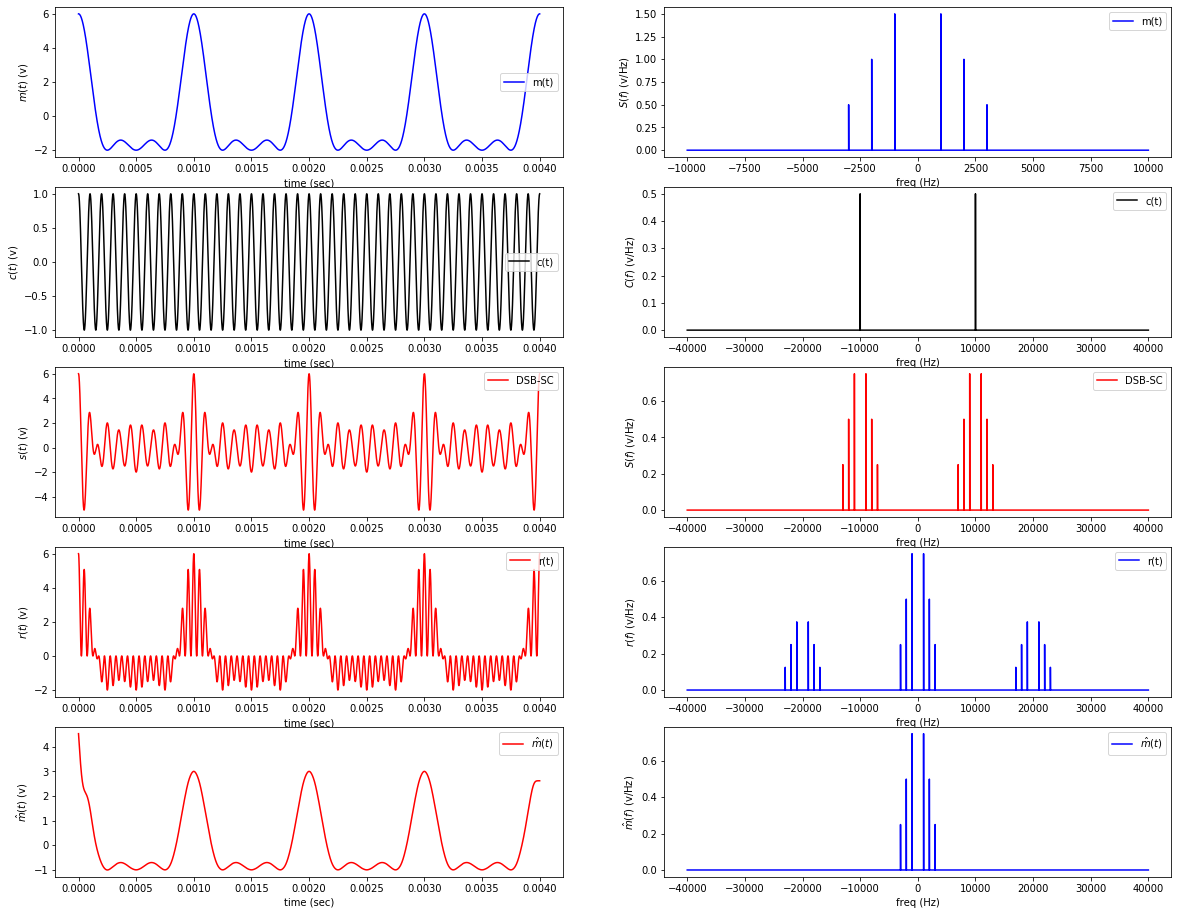

In [32]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal

Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 3000  # Cut-off frequency of the filter
forder=5 # order of the filter

## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)

## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

rt=DSBSC_demod(st,ct) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,16))
ax1 = f.add_subplot(521)
ax2 = f.add_subplot(522)
ax3 = f.add_subplot(523)
ax4 = f.add_subplot(524)
ax5 = f.add_subplot(525)
ax6 = f.add_subplot(526)
ax7 = f.add_subplot(527)
ax8 = f.add_subplot(528)
ax9 = f.add_subplot(529)
ax10 = f.add_subplot(5,2,10)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()


ax3.plot(t,ct,'k',label='c(t)')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,st,'r',label='DSB-SC')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

ax7.plot(t,rt,'r',label='r(t)')
ax7.set_xlabel('time (sec)')
ax7.set_ylabel('$r(t)$ (v)')
ax7.legend()

ax9.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax9.set_xlabel('time (sec)')
ax9.set_ylabel('$\hat{m}(t)$ (v)')
ax9.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='c(t)')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='DSB-SC')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Rf = np.abs(np.fft.fft(rt))
freqs = np.fft.fftfreq(rt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Rf=Rf[idx]/N
ax8.plot(freqs, Rf,'b',label='r(t)')
ax8.set_xlabel('freq (Hz)')
ax8.set_ylabel('$r(f)$ (v/Hz)')
ax8.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax10.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax10.set_xlabel('freq (Hz)')
ax10.set_ylabel('$\hat{m}(f)$ (v/Hz)')
ax10.legend()


As can be observed, the modulating signal (message) has been recovered.

**Exercise**: What do you observe when you change the values of the following parameters: \\
1- $f_c$ \\
2- $f_m$ \\
3- $f_{3dB}$ \\
4- Order of the LPF

# DSB-SC modulation/demodulation: effect of carrier noncoherence in phase  on demodulated signal

Let us simulate DSB-SC demdoulation with carrier noncoherence in phase, let us assume phase difference of 80 degree

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


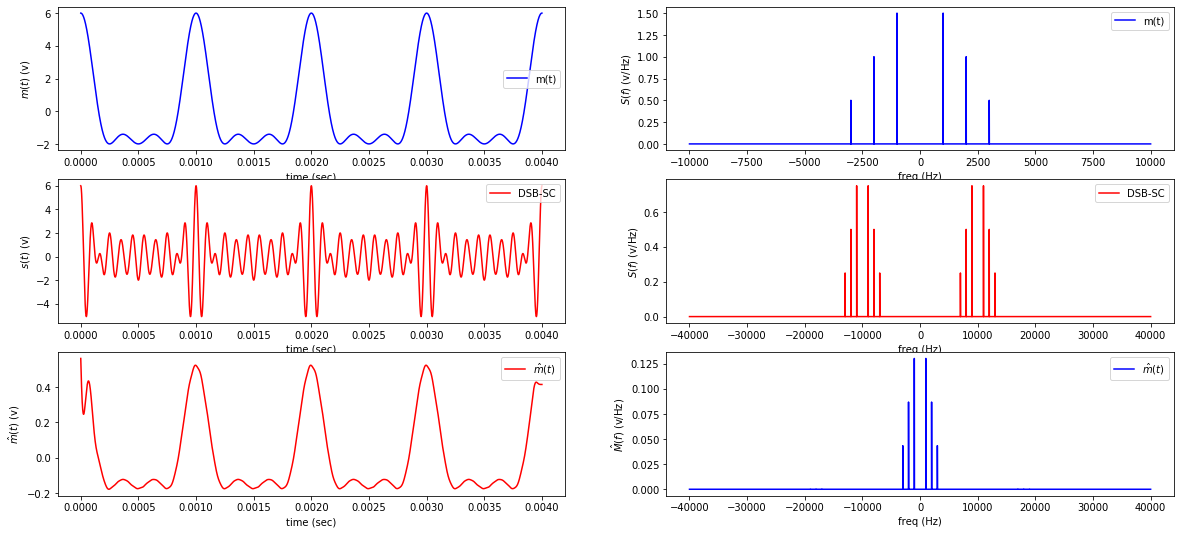

In [33]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal

Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 3000  # Cut-off frequency of the filter
forder=5 # order of the filter

Phi=80 #carrier noncoherence in phase
###############################################
## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)


## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm
t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

## DSB-SC Demodulation
ct=func_ct(Ac,fc,t,Phi) # carrier
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,9))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,st,'r',label='DSB-SC')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s(t)$ (v)')
ax3.legend()

ax5.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$\hat{m}(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()


Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# DSB-SC Demodulation
ct=func_ct(Ac,fc,t,Phi) # carrier
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax4.plot(freqs, Sf,'r',label='DSB-SC')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$S(f)$ (v/Hz)')
ax4.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax6.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$\hat{M}(f)$ (v/Hz)')
ax6.legend()


As can be observed the demodulated signal is highly attenutaed. However, the modulating (message) signal can still be recovered.

**Exercise**: Change the phase of carrier at demodulator and observe the demdoulated signal.

# # DSB-SC modulation/demodulation: effect of carrier noncoherence in frequency on demodulated signal

Let us simulate DSB-SC demdoulation with carrier noncoherence in frequency, le us assume frequency deviation (df) pf 100 Hz. 

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


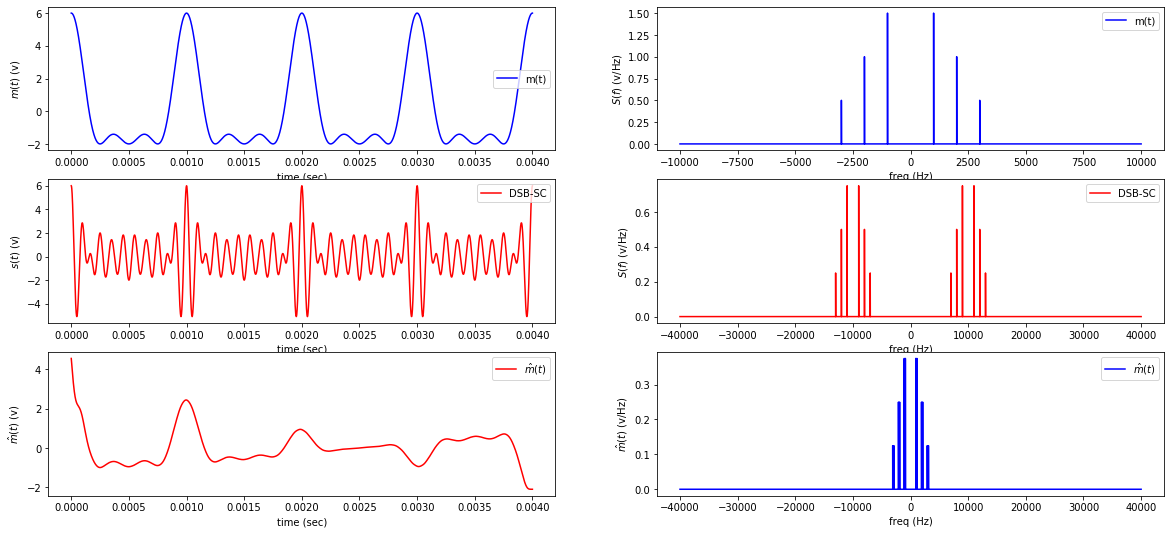

In [35]:
Am1=3 # amplitude of message signal
fm1=1000 # fequency of carrier signal

Am2=2 # amplitude of message signal
fm2=2000 # fequency of carrier signal

Am3=1 # amplitude of message signal
fm3=3000 # fequency of carrier signal

Ac=1 # amplitude of carrier signal
fc=10000 # fequency of carrier signal

fm1_3=[fm1,fm2,fm3]

## LPF parameters 
f3db = 3000  # Cut-off frequency of the filter
forder=5 # order of the filter

df=100 #carrier noncoherence in frequency
###############################################
## -- no need to change code after this line
## Compute fundemntal freq of the message signal for plotting purposes
fm=np.gcd.reduce(fm1_3)


## ---- time-domain
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm
t=np.arange(Tstart,Tstop,Tstep) # time
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

## DSB-SC Demodulation
ct=func_ct(Ac,fc+df,t,0) # carrier
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

## apply the filter
mhat=func_filter(rt,f3db,Tstep,forder)

f = plt.figure(figsize=(20,9))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='m(t)')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,st,'r',label='DSB-SC')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s(t)$ (v)')
ax3.legend()

ax5.plot(t,mhat,'r',label='$\hat{m}(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$\hat{m}(t)$ (v)')
ax5.legend()

## ---- frequency-domain
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='m(t)')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()


Tstart=0; Tstop=100000/fc; Tstep=0.125/fc
t=np.arange(Tstart,Tstop,Tstep) # time
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # message

# DSB-SC Modulation
ct=func_ct(Ac,fc,t,0) # carrier
st=DSBSC_mod(mt,ct) # DSB-SC modulation

# DSB-SC Demodulation
ct=func_ct(Ac,fc+df,t,0) # carrier
rt=DSBSC_demod(st,ct) # DSB-SC demodulation

mhat=func_filter(rt,f3db,Tstep,forder)
mhat=np.array(mhat)

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax4.plot(freqs, Sf,'r',label='DSB-SC')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$S(f)$ (v/Hz)')
ax4.legend()

Mhatf = np.abs(np.fft.fft(mhat))
freqs = np.fft.fftfreq(mhat.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mhatf=Mhatf[idx]/N
ax6.plot(freqs, Mhatf,'b',label='$\hat{m}(t)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$\hat{m}(t)$ (v/Hz)')
ax6.legend()


As can be observed the signal is distorted and the modulating (message) signal can't be recovered.

**Exercise**: Change the frequency of carrier at demodulator and observe the demdoulated signal.